Suite de premier fichier
--------
## *&copy; Edited by: BELAREF Nail & DJEGHRI Amine

# Plan :
### Unsupervised model
### Gloval overview on data: 
   #### *-Importing librairies*
   #### *-Importing dataSet*
   #### *-Converting to dataframe*
   #### *-Overviewing data*
   #### *-Data statics*
### Problematic 03
   #### *-Comedy vs Drama*
   #### *-Data visualisation*
   #### *-Applying k-means algorithm*
   #### *-Kmeans evaluation*
   #### *-Adding another feature (3D)*
   #### *-Kmeans evaluation (Coefficient de Silhouette)*
### Problematic 04

Modèle non supervisé
--------

Dans cette partie on va d'abord commencer par charger et mettre en forme les données (en dataframe) ce qui va nous faciliter le traitement par la suite. Ensuite en faisant un apeçu globale sur nos données accompagné d'une description statistique on choisit des problématiques qui nous fournit de nouvelles connaissances!
1. **Problématique 03**: Catégoriser des groupes d'utilisateurs on se basant sur la note moyenne qui ont données pour deux genres différent (2D), après pour trois genres différent (3D)
1. **Problématique 04**: Avec les fonctions codées à la premiere partie on choisit de nouveaux attributs pour extraire de nouvelles informations(par exemple: degré de reussite d'un film selon le budget dépensé et le score obtenue, les genres de film pour lesquelle un acteur pourrait jouer..)

Global overview on data & Descriptive statics
--------

### Importing libraries

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
import pickle as pkl
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
%matplotlib inline  

### Importing dataSet

In [3]:
# Chargement des données MovieLens
fname_links = 'D:\Downloads\Projet3i026\ml-latest-small/links.csv'# à compléter avec le chemin d'accès au fichier
links = pd.read_csv(fname_links, encoding='utf8')
movies = pd.read_csv('D:/Downloads/Projet3i026/ml-latest-small/movies1.csv', encoding='utf8')
tags = pd.read_csv('D:/Downloads/Projet3i026/ml-latest-small/tags.csv', encoding='utf8')
ratings = pd.read_csv('D:/Downloads/Projet3i026/ml-latest-small/ratings.csv', encoding='utf8')

In [4]:
# Chargement des données complémentaires
acteurs = pkl.load(open('D:/Downloads/Projet3i026/ml-latest-small/act_v2.pkl', "rb"))
film = pkl.load(open('D:/Downloads/Projet3i026/ml-latest-small/film_v2.pkl', "rb"))
crew = pkl.load(open('D:/Downloads/Projet3i026/ml-latest-small/crew_v2.pkl', "rb"))
moviesComplementaire= pd.read_csv('D:/Downloads/Projet3i026/ml-latest-small/moviesComplementaire.csv', encoding='latin-1')

In [4]:
print("acteur: ",len(acteurs))
print("film: ",len(film))
print ("crew: ",len(crew))
print("movies: ",len(movies))
print("links: ",len(links))
print("ratings: ",len(ratings))
print("movieComplementaire: ",len(moviesComplementaire))

acteur:  26908
film:  26908
crew:  26908
movies:  9742
links:  9742
ratings:  100836
movieComplementaire:  6820


### Converting to dataframe

In [6]:
#Fonction pour convertir les données en dataframe pour mieux les traiter
def pkl_to_DataFrame(Base):
    L=[[] for k in range(len(Base[0][0].keys()))]
    data={}
    n=0
    longueur_dict=len(Base[0][0])
    for i in range(len(Base)):
        for j in range(0, len(Base[i])):
            m=0
            for k, val in Base[i][j].items():
                L[m].append(val)
                m+=1
    for k in Base[0][0].keys():
        data[k]=L[n]
        n+=1
    return pd.DataFrame(data)


def film_to_DataFrame(Base):
    clef = [e for e in Base[0].keys()]
    d={e:[] for e in clef}
    for i in range(len(Base)):
        for k, val in Base[i].items():
            for e in clef:
                if e==k:
                    d[e].append(val)
    for e in clef:
        if e=='release_date' or e=='popularity':
            d[e].append("")
            d[e].append("")
    return pd.DataFrame(d)

In [7]:
#Tronsformation des données complémentaires en DataFrame pour mieux les analyser
acteur_df=pkl_to_DataFrame(acteurs)
crew_df=(pkl_to_DataFrame(crew)).sort_values(by=['id'])
film_df=film_to_DataFrame(film)

## Overviewing data

In [8]:
movies.head()


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [9]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [10]:
ratings.head()


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [285]:
acteur_df.head()

,cast_id,character,credit_id,gender,id,name,order,profile_path
0,14,Woody (voice),52fe4284c3a36847f8024f95,2,31,Tom Hanks,0,/xxPMucou2wRDxLrud8i2D4dsywh.jpg
1,15,Buzz Lightyear (voice),52fe4284c3a36847f8024f99,2,12898,Tim Allen,1,/dDbtWMGdhatUjCIYolc312R2ygu.jpg
2,16,Mr. Potato Head (voice),52fe4284c3a36847f8024f9d,2,7167,Don Rickles,2,/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg
3,17,Slinky Dog (voice),52fe4284c3a36847f8024fa1,2,12899,Jim Varney,3,/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg
4,18,Rex (voice),52fe4284c3a36847f8024fa5,2,12900,Wallace Shawn,4,/oGE6JqPP2xH4tNORKNqxbNPYi7u.jpg


In [467]:
film_df.head(3)

,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,poster_path,release_date,title,video,vote_average,vote_count,popularity
0,False,/dji4Fm0gCDVb9DQQMRvAI8YNnTz.jpg,"[16, 35, 10751]",862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,1995-10-30,Toy Story,False,7.9,9550,22.773
1,False,/7k4zEgUZbzMHawDaMc9yIkmY1qR.jpg,"[12, 14, 10751]",8844,en,Jumanji,When siblings Judy and Peter discover an encha...,/vgpXmVaVyUL7GGiDeiK1mKEKzcX.jpg,1995-12-15,Jumanji,False,7.1,5594,2.947
2,False,/1ENbkuIYK2taNGGKNMs2hw6SaJb.jpg,"[35, 10749]",15602,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,1995-12-22,Grumpier Old Men,False,6.5,140,6.076


In [13]:
crew_df.head()

,credit_id,department,gender,id,job,name,profile_path
152195,54d294bf9251413fd600047c,Production,2,1,Executive Producer,George Lucas,/8qxin8urtFE0NqaZNFWOuV537bH.jpg
23762,52fe4215c3a36847f8002a3d,Production,2,1,Executive Producer,George Lucas,/8qxin8urtFE0NqaZNFWOuV537bH.jpg
23767,52fe4215c3a36847f8002a5b,Editing,2,1,Editor,George Lucas,/8qxin8urtFE0NqaZNFWOuV537bH.jpg
23775,58959632c3a36822e0003388,Writing,2,1,Story,George Lucas,/8qxin8urtFE0NqaZNFWOuV537bH.jpg
43225,588a748cc3a368409301c92a,Crew,2,1,Thanks,George Lucas,/8qxin8urtFE0NqaZNFWOuV537bH.jpg


In [468]:
moviesComplementaire.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


## Data statics

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:22: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


{'(no genres listed)': 34, 'Action': 1828, 'Adventure': 1263, 'Animation': 611, 'Children': 664, 'Comedy': 3756, 'Crime': 1199, 'Documentary': 440, 'Drama': 4361, 'Fantasy': 779, 'Film-Noir': 87, 'Horror': 978, 'IMAX': 158, 'Musical': 334, 'Mystery': 573, 'Romance': 1596, 'Sci-Fi': 980, 'Thriller': 1894, 'War': 382, 'Western': 167}


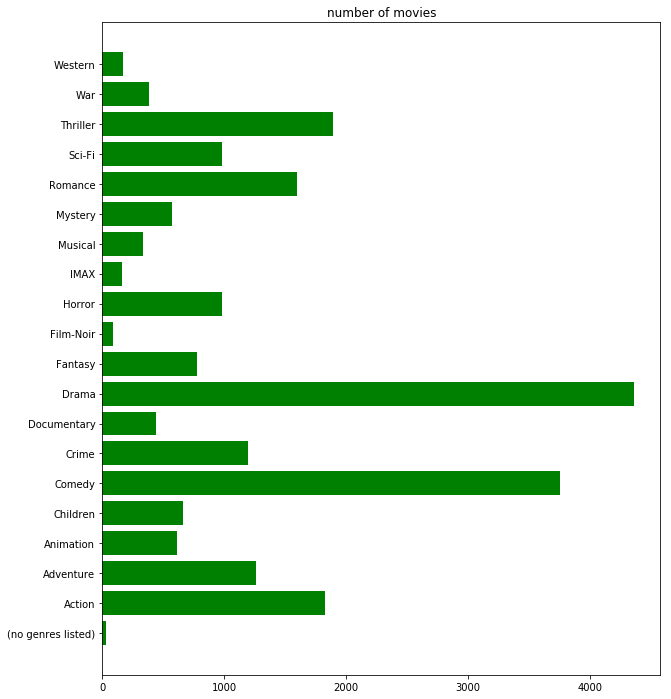

In [15]:
#Extraire les genres dispos
def genre_dispo():
    L =[]
    #D'abord on tire tous les genres dispo
    for i in range(1,len(movies["genres"])):
        L.append((movies["genres"][i]).split('|'))

    V=[]
    for i in range(0, len(L)):
        for j in range(0, len(L[i])):
            V.append(L[i][j])
    #On retire les doublons        
    list_genres=np.unique(V)
    return list_genres

#La fonction suivante déssine l'hsitogramme de nombre de films pour chaque genre donné
def genre_histo():
    
    list_genres=genre_dispo()
    dict_genre={genre:0 for genre in list_genres}
    for genre in list_genres:
        is_genre=movies['genres'].str.contains(str(genre))
        for elem in is_genre:
            if elem==True:
                dict_genre[genre]+=1
    print(dict_genre)
    #Afficher le resultat dans un histogramme                
    fig, ax = plt.subplots(figsize=(10, 12))
    columns = dict_genre.keys()
    y_pos = np.arange(len(columns))

    res = [int(e) for e in dict_genre.values()]

    ax.barh(y_pos, res, align='center', color='green', ecolor='black')
    ax.set_yticks(y_pos)
    labelsY=ax.set_yticklabels(columns)

    ax.set_title('number of movies')

    
    return plt.show()
genre_histo()

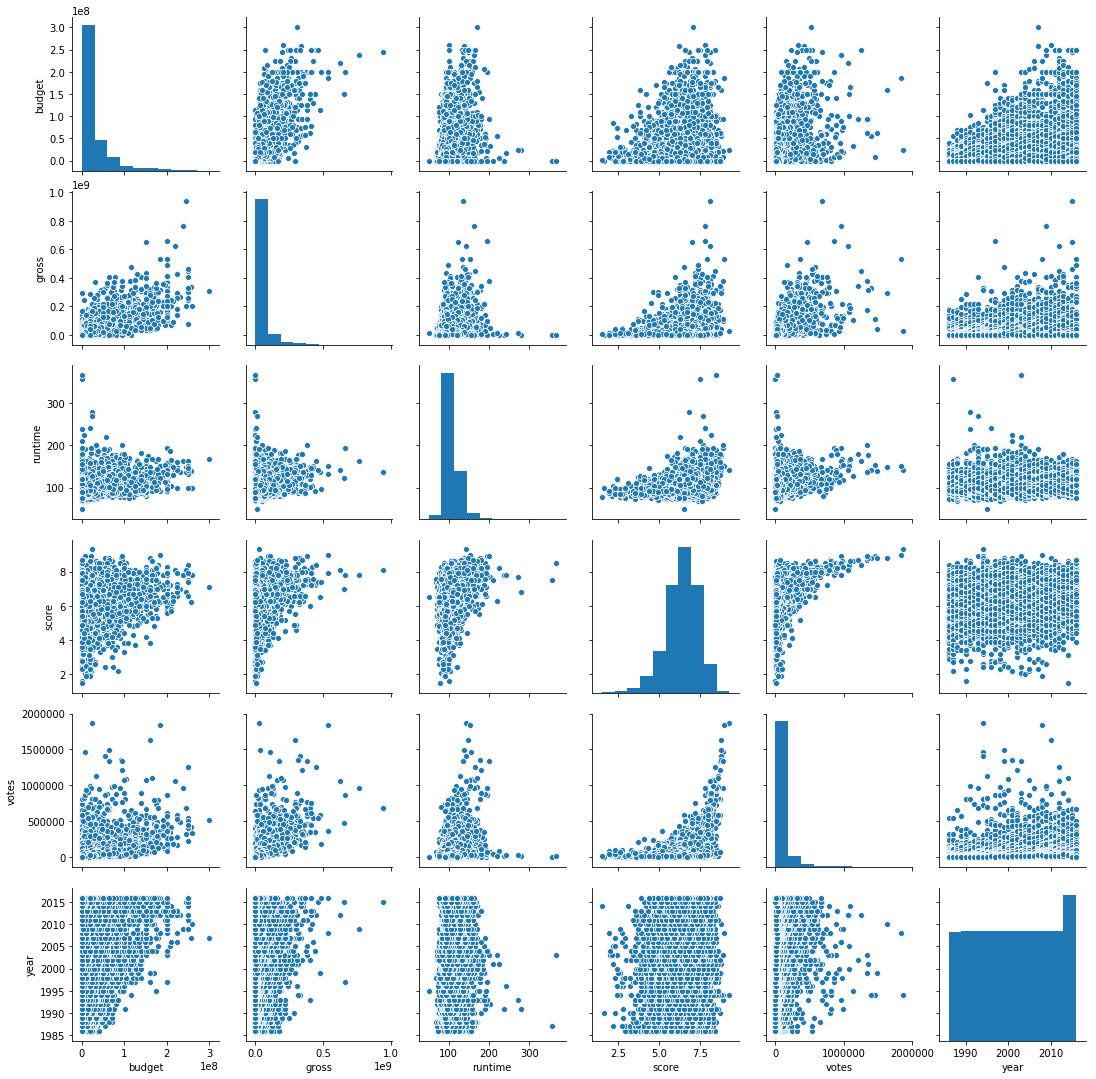

In [469]:
# On profite de l'outil founi en tme 09 seaborn pour visualiser les attributs et voir s'il y'a un rapport de corrélation 
#pertinent dans les données
import seaborn as sns
X = moviesComplementaire
#On drope les attributs non numérique
num_df=X.drop(['company', 'country','director','genre','name','rating','released','star', 'writer'],axis=1)

sns.pairplot(num_df)

#### Remarques et informations obtenues:
1. **year-budget**: les films qui ont un budget élevé sont des films récents, 
1. **budgert-runtime**: la durée d'un film ne dépend pas de son budget
1. **budget-score**: plus le budget est important plus le score est élevé (supérieur à la moyenne), on trouve également des score élevé avec un petit budget mais jamais un grand budget avec un score faible!
1. **runtime-score**: on remarque que le score varient pour les films d'une durée moyenne, par contre on constate quelque films d'une durée longue et qui sont appréciés mais on trouve jamais de long film avec un score faible
1. **vote-score**: on remarque une corrélation linéaire entre le vote et le score avec une variation pour ce dérnier lorsque les films ont un faible vote

<div class="alert alert-block alert-success">
<b>Analyse:</b> 
    D'après l'analyse de l'histogramme et les plots ci-dessus on a décidé d'abord de traiter dans un premier temps la catégorisation des groupes de personnes selon leur préférences de film à travers la moyenne des notes données pour un X-genre.
(Propblématique 03)
    
   Ensuite après avoir mise en forme nos données et codé les fonctions nécessaires pour la problématique précédente, on entame une 4eme problématique en choisisant les features budget et score comme parametres d'entrée et qui semble fournir des informations pertinentes pour pour extraire de nouvelles connaissances: #Degré de reussite des films.
</div>

# Problematic 03:
#### **Description** :
 Catégoriser des groupes d'utilisateurs on se basant sur la note moyenne qui ont donnée pour deux genres différents (2D), Ensuitre pour trois genres différent (3D)

Etapes realisées:
1. Préparer les données
2. Visualiser les plots 
3. appliqué le modèle
4. Analyser

In [9]:
#On associe chaque note utilisateur à un film
movieRatings = pd.merge(movies, ratings)
movieRatings.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


### Commedy versus Drama
###### Après cette analyse rapide des données fournies, on remarque que les deux genres les plus appréciés par les téléspéctateurs sont #Comedy et #Drama. Donc pour distinger les différents catégorie de ces utilisateurs et leurs préférences, on va appliquer un clustering partitionnel.

In [10]:
#On va d'abord définir une fonction qui calcule la note moyenne de chaque utilisateur
#pour tous les films comedie et drama
def genre_ratings(genre):
    return movieRatings[movieRatings['genres'].str.contains(genre)].groupby(['userId'])['rating'].mean().round(2)

#Une fonction qui affiche le tableau des notes moyennes données par les utilisateur pour deux genres différents
def genres_ratings(genre1, genre2):
    if(genre1==genre2):
        return -1
    genre1_df = pd.DataFrame(genre_ratings(genre1))
    genre2_df = pd.DataFrame(genre_ratings(genre2))
    genre1_df[genre2] = genre2_df['rating']
    avg_rating = genre1_df.rename(index=str, columns={"rating": genre1})
    return avg_rating

In [11]:
my_genre_ratings=genres_ratings('Comedy','Drama')
pd.DataFrame(my_genre_ratings[:5])

,Comedy,Drama
userId,,
1,4.28,4.53
2,4.00,3.88
3,1.00,0.75
4,3.51,3.48
5,3.47,3.80


##### Pour avoir des résultats plus cohérents on va limiter notre périmètre d'études en gardant seulement les téléspéctateurs qui préférent soit les films de comédie soit les films de drama. (et évidement ils ont d'autres préférences qu'on ne va pas traiter dans cet exemple)

In [12]:
def bias_genre_rating_dataset(genre_ratings, score_limit_1, score_limit_2):
    biased_dataset = genre_ratings[((genre_ratings['Comedy'] < score_limit_1) & (genre_ratings['Drama'] > score_limit_2)) | ((genre_ratings['Drama'] < score_limit_1) & (genre_ratings['Comedy'] > score_limit_2))]
    biased_dataset = pd.concat([biased_dataset[:300], genre_ratings[:2]])
    #On utilise to_records qui met l'index comme la premier champ de notre tuple, puis on 
    #retransforme en dataframe pour avoir trois colonne(user_id,genre1,genre2)
    biased_dataset = pd.DataFrame(biased_dataset.to_records())
    return biased_dataset

In [20]:
biased_dataset = bias_genre_rating_dataset(my_genre_ratings, 3.2, 2.5)
print("nombre d'exemples obtenus après avoir guidé et restreint nos données:", len(biased_dataset))
print("146 personnes qui prèferent soit la comédie soit le drama")
print(biased_dataset.head())
rating_2D=biased_dataset.drop(columns=['userId'])
rating_2D.head()


nombre d'exemples obtenus après avoir guidé et restreint nos données: 146
146 personnes qui prèferent soit la comédie soit le drama
  userId  Comedy  Drama
0      7    3.16   3.13
1     10    3.27   3.15
2     14    2.71   3.71
3     19    2.64   2.61
4     21    3.20   2.95


,Comedy,Drama
0,3.16,3.13
1,3.27,3.15
2,2.71,3.71
3,2.64,2.61
4,3.20,2.95


### Data visualisation

##### Arrivant à ce stade on va construire quelques plots pour obrenir un apperçu plus claire pour la dataset qu'on vient de créer et ces caractéristques.

In [418]:
#On définit une fonction de dessein 'scatterplot'

def draw(x,y, x_label,y_label):
    fig = plt.figure(figsize=(7,7))
    ax = fig.add_subplot(111)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.scatter(x, y, marker='.')
    

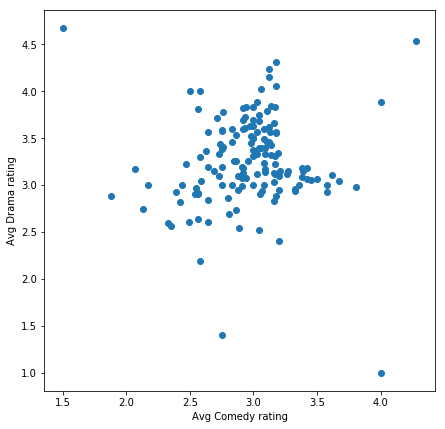

In [127]:
draw(biased_dataset['Comedy'], biased_dataset['Drama'], 'Avg Comedy rating', 'Avg Drama rating')

### Applying the unsupervised model
##### Les données qu'on vient d'éxtraire marchent très bien avec le modèle non supervisé k-moyennes pour séparer en k-groupes distincts

In [5]:
#Importer les fonctions utiles de k-moyenne coder pendant les séances de tme

# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('D:\Downloads/Projet3i026')
# Importation de la librairie iads
import iads as iads
#On importe algorithme de k-moyenne depuis la libraire iads
from iads import kmoyennes as km

###### La normalisation des données ne va rien nous apporter dans ce cas car tous les exemples sont déja sur la même echelle

### pour K=2

In [84]:
#Mon algo fait k+1 itérations donc pour k=2, je dois mettre k=1
centres_2k, l_affectation_2k = km.kmoyennes(1, rating_2D, 0.01, 10)
print("Affichage des centres: \n",centres_2k)
print("Affichage des affectations: ",l_affectation_2k)

iteration 0   Inertie : 37.50287066365008
iteration 1   Inertie : 36.84650357620961
iteration 2   Inertie : 36.663727860501574
iteration 3   Inertie : 36.62092841269842
iteration 4   Inertie : 36.58602917082917
iteration 5   Inertie : 36.54458445932238
iteration 6   Inertie : 36.51659896800826
iteration 7   Inertie : 36.51659896800826
Affichage des centres: 
      Comedy     Drama
0  2.758431  2.830588
1  3.071263  3.492526
Affichage des affectations:  {0: [3, 4, 5, 6, 7, 8, 9, 10, 11, 15, 16, 17, 25, 27, 32, 33, 35, 36, 42, 44, 45, 49, 52, 53, 61, 64, 65, 66, 68, 69, 72, 76, 79, 84, 85, 90, 92, 94, 100, 101, 104, 110, 112, 113, 120, 124, 128, 130, 134, 140, 141], 1: [0, 1, 2, 12, 13, 14, 18, 19, 20, 21, 22, 23, 24, 26, 28, 29, 30, 31, 34, 37, 38, 39, 40, 41, 43, 46, 47, 48, 50, 51, 54, 55, 56, 57, 58, 59, 60, 62, 63, 67, 70, 71, 73, 74, 75, 77, 78, 80, 81, 82, 83, 86, 87, 88, 89, 91, 93, 95, 96, 97, 98, 99, 102, 103, 105, 106, 107, 108, 109, 111, 114, 115, 116, 117, 118, 119, 121, 122

On défénit ensuite la fonction de cluster plotting:

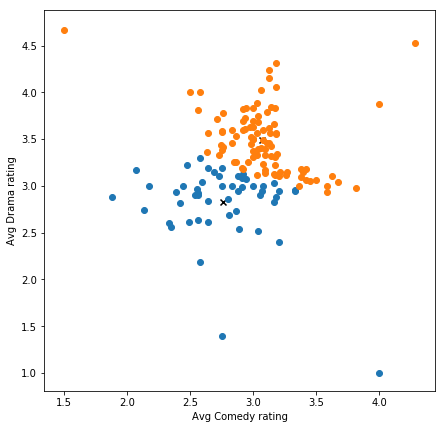

In [85]:
#Plot
km.affiche_resultat(rating_2D, centres_2k, l_affectation_2k,'Avg Comedy rating', 'Avg Drama rating')

##### Depuis le plot ci-dessus et après 7 itérations pour fixer nos centroides, on peut constater que la logique derière ce clustering est basée sur le nombre de personnes qui ont notés les films de 'Drama'. les téléspéctateurs qui leur note moyenne pour les films de drama est supérieur à ~3.2 appartiennent à un groupe, et les utilisateurs qui ont donnés une moyenne inférieure à environ ~3 appartiennent au second groupe.
##### Donc on distingue deux groupe:
1. **Orange group**: les gens qui préférent le drama
1. **blue group**: les personnes qui n'aiment pas trop le drama

### Pour K=3

In [86]:
centres_3k, l_affectation_3k = km.kmoyennes(2, rating_2D, 0.01, 10)
print("Affichage des centres: \n",centres_3k)
print("Affichage des affectations: ",l_affectation_3k)

iteration 0   Inertie : 27.491168711672803
iteration 1   Inertie : 26.8450193115942
iteration 2   Inertie : 26.74053422540075
iteration 3   Inertie : 26.74053422540075
Affichage des centres: 
      Comedy     Drama
0  2.985574  3.680328
1  3.281707  3.001463
2  2.631364  2.922500
Affichage des affectations:  {0: [2, 18, 19, 21, 22, 24, 28, 29, 30, 38, 40, 41, 43, 46, 48, 50, 51, 54, 56, 57, 60, 70, 71, 75, 77, 78, 81, 82, 86, 87, 88, 91, 93, 95, 96, 97, 98, 102, 103, 105, 106, 107, 108, 109, 111, 114, 116, 117, 118, 121, 122, 125, 126, 127, 129, 133, 137, 139, 143, 144, 145], 1: [0, 1, 4, 12, 13, 14, 16, 23, 25, 27, 31, 34, 36, 37, 47, 52, 55, 58, 59, 62, 63, 67, 73, 74, 80, 83, 84, 89, 90, 92, 94, 113, 119, 120, 123, 131, 132, 136, 138, 141, 142], 2: [3, 5, 6, 7, 8, 9, 10, 11, 15, 17, 20, 26, 32, 33, 35, 39, 42, 44, 45, 49, 53, 61, 64, 65, 66, 68, 69, 72, 76, 79, 85, 99, 100, 101, 104, 110, 112, 115, 124, 128, 130, 134, 135, 140]}


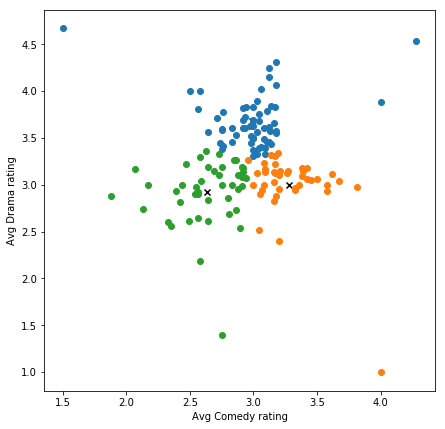

In [87]:
#Plot
km.affiche_resultat(rating_2D, centres_3k, l_affectation_3k,'Avg Comedy rating', 'Avg Drama rating')

<div class="alert alert-block alert-info">
<b>Analyse:</b>On peut facilement remaruquer que l'attribut 'Comedy rating' commence à avoir un role à jouer dans la décision de clustering et on distinct trois groupes:<br>
   1. Utilisateurs qui aiment plus la comedie et un peu moins le drama *groupe Orange*<br></br>
   2. Utilisateurs qui préferent les films drama *groupe bleu*<br></br>
   3. Utilisateurs qui ont regardé les deux genres mais ne les apprécient pas trop (note <~3) *groupe verte* 
   </div>

##### Maintenat essayant de rajouter un nouveau groupe et voir ce que ça donne

### K=4

In [104]:
centres_4k, l_affectation_4k = km.kmoyennes(3, rating_2D, 0.01, 15) #k=4 en vrai, On peut augmenter le nombre d'itération pr un résultat meilleur
print("Affichage des centres: \n",centres_4k)
print("Affichage des affectations: ",l_affectation_4k)

iteration 0   Inertie : 24.499782894158983
iteration 1   Inertie : 23.950999961153826
iteration 2   Inertie : 23.394173068587058
iteration 3   Inertie : 23.070705168827104
iteration 4   Inertie : 22.773077448717952
iteration 5   Inertie : 22.60994903561425
iteration 6   Inertie : 22.531424205198988
iteration 7   Inertie : 22.520559831649834
iteration 8   Inertie : 22.513988019323673
Affichage des centres: 
      Comedy     Drama
0  2.984444  3.777778
1  2.498800  2.750400
2  3.420909  2.883182
3  2.970741  3.221481
Affichage des affectations:  {0: [2, 18, 22, 24, 28, 29, 38, 40, 41, 43, 48, 51, 54, 56, 60, 70, 77, 78, 81, 86, 87, 88, 91, 96, 97, 98, 105, 106, 107, 108, 109, 111, 116, 117, 118, 121, 125, 126, 127, 129, 133, 137, 139, 144, 145], 1: [3, 5, 7, 8, 9, 11, 17, 32, 33, 42, 45, 49, 53, 64, 65, 66, 68, 69, 100, 101, 110, 112, 128, 134, 140], 2: [1, 4, 13, 14, 16, 23, 25, 31, 34, 37, 52, 58, 59, 67, 73, 83, 84, 92, 94, 120, 131, 138, 142], 3: [0, 6, 10, 12, 15, 19, 20, 21, 26, 27

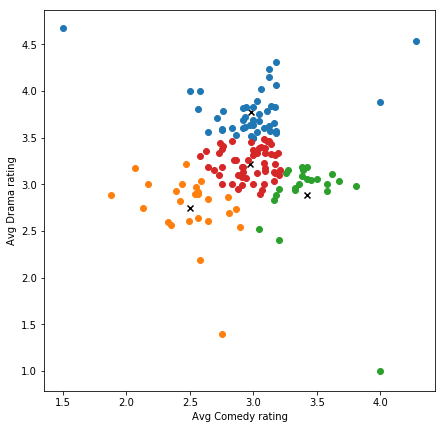

In [105]:
#Plot
km.affiche_resultat(rating_2D, centres_4k, l_affectation_4k,'Avg Comedy rating', 'Avg Drama rating')

<div class="alert alert-block alert-success">
<b>Analyse:</b> avec K=4 nous permet de distinguer encore un nouveau groupe qui:<br></br>
    1.Groupe rouge: des utilisateurs qui apprécient les deux genre, comedie et drama.


### Pour K= 5

In [23]:
#K=5
centres_5k, l_affectation_5k = km.kmoyennes(4, rating_2D, 0.01, 15) #k=4 en vrai, On peut augmenter le nombre d'itération pr un résultat meilleur
print("Affichage des centres: \n",centres_5k)
print("Affichage des affectations: ",l_affectation_5k)

iteration 0   Inertie : 24.875344921479233
iteration 1   Inertie : 22.94896238576239
iteration 2   Inertie : 22.896546166932488
iteration 3   Inertie : 22.896546166932488
Affichage des centres: 
      Comedy     Drama
0  3.361111  4.095556
1  3.110000  1.530000
2  2.941579  2.988158
3  2.193333  4.223333
4  2.958727  3.544182
Affichage des affectations:  {0: [40, 41, 77, 88, 97, 106, 129, 144, 145], 1: [53, 69, 92], 2: [0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 23, 25, 26, 27, 31, 32, 33, 34, 35, 36, 37, 39, 42, 44, 45, 47, 49, 52, 55, 58, 59, 61, 63, 64, 65, 66, 67, 68, 72, 73, 74, 79, 80, 83, 84, 85, 89, 90, 94, 99, 100, 101, 104, 110, 112, 113, 115, 119, 120, 124, 128, 130, 131, 134, 136, 138, 140, 141, 142], 3: [117, 126, 127], 4: [2, 18, 19, 20, 21, 22, 24, 28, 29, 30, 38, 43, 46, 48, 50, 51, 54, 56, 57, 60, 62, 70, 71, 75, 76, 78, 81, 82, 86, 87, 91, 93, 95, 96, 98, 102, 103, 105, 107, 108, 109, 111, 114, 116, 118, 121, 122, 123, 125, 132, 133, 135, 137, 139, 143

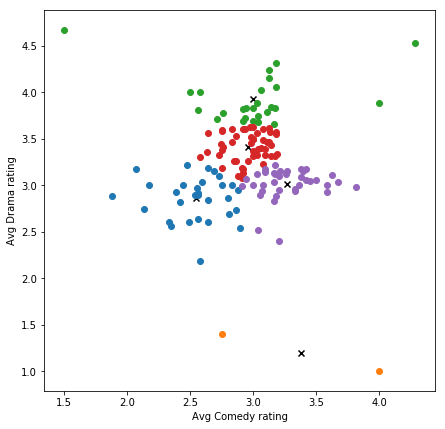

In [91]:
#Plot
km.affiche_resultat(rating_2D, centres_5k, l_affectation_5k,'Avg Comedy rating', 'Avg Drama rating')

<div class="alert alert-block alert-danger">
<b>Analyse:</b> On remarque quelques valeurs abérrantes dans Le plot initial qui ont tendance à biaser l'étude donc on peut dire que un 5-ieme cluster nous ne fournit pas de nouvelles informations car on commence à constater que plus on a de groupes plus les utilisateurs ont des préférence similaires à des utilisateurs qui appartiennent à d'autre groupes. Donc on s'arrete à 4-clusters
</div>

## K-means evaluation
Ici on va utiliser la méthode d'évaluation vu en cours pour mesurer la qualité des clusters obtenus afin de choisir un k optimal:<br></br>
1. Distance inter-cluster: l'optimal serait une valeur minimal 'compacité'
1. Distance intra-cluster: l'optimal serait une valeur maximal 'séparabilité'

On choisit l'index de Dunn pour trouver une bonne partition.(plus cette distance est grande meilleure est notre partition)

In [106]:
KMax=5
indices_Dunn=[]
for i in range(2,KMax+1):
    val = km.evaluation("Dunn", data2D_norm,vars()['centres_'+str(i)+'k'],vars()['l_affectation_'+str(i)+'k'])
    indices_Dunn.append(val)
    print("Pour k="+str(i)+": \tindice de Dunn:", val)

Pour k=2: 	indice de Dunn: 1.3668565491308136
Pour k=3: 	indice de Dunn: 1.5275483012541355
Pour k=4: 	indice de Dunn: 1.7983650962798479
Pour k=5: 	indice de Dunn: 1.7765693928837976


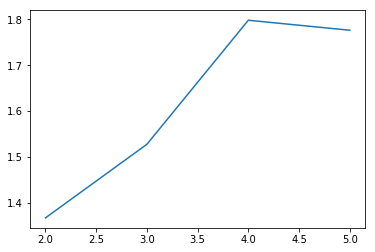

In [107]:
k=[i for i in range(2,6)]
plt.plot(k, indices_Dunn)

**Effectivement** cette méthode nous donne une super évaluation et analyse sur le nombre de cluster qu'on est sensé trouvé et on remarque que k=4 avec un indice de Dunn maximal(objectif) est le nombre de cluster optimal, ainsi k>4 nous fourit aucune connaissance supplémentaires

## Adding new features (3D)

In [383]:
# On redéfinit une fontion qui prend n-genres (une liste)
def genres_ratings_pool(genres):
    genre_df=pd.DataFrame(genre_ratings(genres[0]))
    g0=genres.pop(0)
    for g in genres:
        genre_df[g]=pd.DataFrame(genre_ratings(g))
   
    avg_rating = genre_df.rename(index=str, columns={"rating": g0})
    return avg_rating
    
pool_rating_genres=genres_ratings_pool(['Comedy', 'Drama', 'Action'])
print(len(pool_rating_genres))
pool_rating_genres.head()

609


,Comedy,Drama,Action
userId,,,
1,4.28,4.53,4.32
2,4.00,3.88,3.95
3,1.00,0.75,3.57
4,3.51,3.48,3.32
5,3.47,3.80,3.11


In [157]:
pool_rating_genres['Comedy'].head()
mes_genres=['Comedy','Drama','Action']
data_3D=bias_genre_rating_dataset(pool_rating_genres, 3.2,2.5)
data_3D.head()

,userId,Comedy,Drama,Action
0,7,3.16,3.13,3.26
1,10,3.27,3.15,3.50
2,14,2.71,3.71,3.33
3,19,2.64,2.61,2.73
4,21,3.20,2.95,3.46


In [384]:
#Les tp réalisés pendant les séances tmes ne me permettent pas de  traiter des données superieur à 3D
#donc et malheureusement je suis dans l'obligation de faire un import de k-means de puis la librairie sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
#On nettoie les valeurs NaN avec dropna vu en TME1
print("nombre d'exemples avant le dropna: ", len(data_3D))
data_3D_ = data_3D.dropna()
print("nombre d'exemples après le notoyage: ", len(data_3D_))

pool_rating_genres_=pool_rating_genres.dropna()

nombre d'exemples avant le dropna:  146
nombre d'exemples après le notoyage:  145


In [385]:
#Fonction de plot 3D des cluster prédit aavec kmeans
def draw_3D(k, data, colors):
    kmeans= KMeans(n_clusters=k)
    #Entrainer le modele
    kmeans = kmeans.fit(data)

    #array qui contien les exemple étiquité, plus nos centroids
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    i=0
    fig = plt.figure()
    fignum, figsize=(4, 3)
    ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=48, azim=134)
    ax.set_xlabel('Avg-Comedy-ratin axis')
    ax.set_ylabel('Avg-Drama-ratin axis')
    ax.set_zlabel('Action-ratin axis')
    for x in labels:
        ax.scatter(data.iloc[i,0],data.iloc[i,1],data.iloc[i,2], color=colors[x], edgecolor='face')
        i+=1
    for x in range(0,k):
        #plot centroids
        print("Centroid ",x,":\t", centroids[x])
        ax.scatter(centroids[x,0],centroids[x,1],centroids[x,2],c='black', marker='*',s=50)
        #Rendre le centroide marque grande
        ax.text3D(centroids[x,0],centroids[x,1],centroids[x,2]+2,"cluster"+str(x), horizontalalignment='center',bbox=dict(alpha=.8, edgecolor='w', facecolor='w'))
     

### K=3

Centroid  0 :	 [3.37476015 3.58601476 3.4001845 ]
Centroid  1 :	 [4.00235741 4.15844106 4.00346008]
Centroid  2 :	 [2.72260274 2.95328767 2.52219178]


,userId,Comedy,Drama,Action
14,75,3.81,2.98,3.21
44,214,2.75,3.00,2.80
16,78,3.16,2.83,3.31
99,427,2.85,3.26,3.09
94,395,3.18,2.88,3.38
11,55,2.56,2.92,2.90
71,314,3.06,3.40,2.82
86,373,2.56,3.81,2.57
110,478,2.81,2.69,3.12
116,490,2.75,3.59,2.88


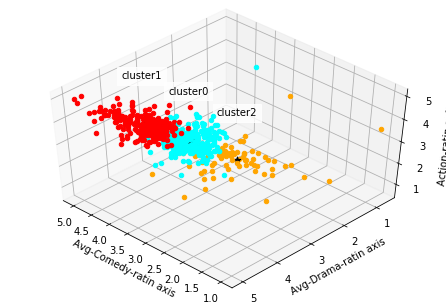

In [386]:
colors=['cyan', 'red', 'orange']
draw_3D(3, pool_rating_genres_, colors)
data_3D_.sample(10)

### K=4

Centroid  0 :	 [3.26822115 3.49548077 3.31802885]
Centroid  1 :	 [3.76833333 3.95934211 3.75394737]
Centroid  2 :	 [4.24186916 4.35186916 4.25439252]
Centroid  3 :	 [2.704375   2.90046875 2.45640625]


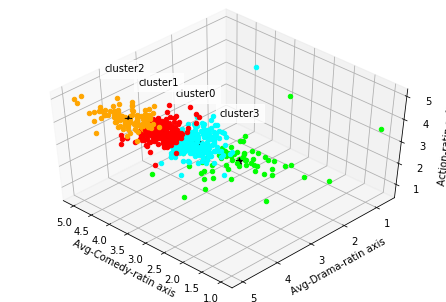

In [388]:
colors=['cyan', 'red', 'orange','lime']
draw_3D(4, pool_rating_genres_, colors)

### K=5

Centroid  0 :	 [3.361  3.5645 3.4593]
Centroid  1 :	 [3.84193694 4.02157658 3.84887387]
Centroid  2 :	 [2.39090909 2.56030303 2.50909091]
Centroid  3 :	 [4.36694444 4.44541667 4.30597222]
Centroid  4 :	 [3.09375 3.38525 2.74175]


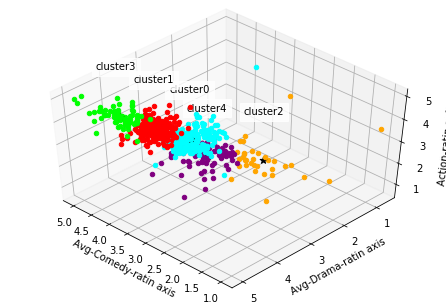

In [276]:
colors=['cyan', 'red', 'orange','lime','purple']
draw_3D(5, pool_rating_genres_, colors)

Centroid  0 :	 [3.19438017 3.36752066 3.46652893]
Centroid  1 :	 [4.39529412 4.44808824 4.30985294]
Centroid  2 :	 [2.3815625 2.541875  2.5296875]
Centroid  3 :	 [3.08934426 3.39590164 2.60606557]
Centroid  4 :	 [3.85370166 4.06160221 3.93845304]
Centroid  5 :	 [3.59965278 3.80201389 3.42486111]


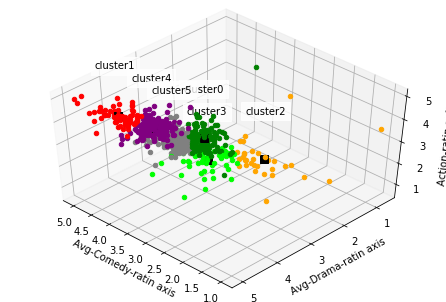

In [174]:
#K=6
colors=['green', 'red', 'orange','lime','purple','grey']
draw_3D(6, pool_rating_genres_, colors)

<div class="alert alert-block alert-success">
<b>Analyse:</b> 
    Ici on utilise toujour l'axe des x et des y pour représenter les notes des films de comedy et de drama, en plus on plot l'axe des z pour représenter les notes moyennes des films d'actions
    
On peut voir que l'ajout d'une 3eme dimension fait varier les clusters et augmente éventuellement leurs nombre. plus on rajoute des données pour notre modèle plus les préférences seront similaires pour chaque groupe.
    
la chose embetante dans ces graphes c'est que plus on rajoute des dimensions plus l'analyse sera difficile et on commence à ne pas visualiser correctement les groupe supérieur à 3D.
</div>

## Kmeans evaluation (Coefficient de Silhouette)

Dans ce qui suit on va évaluer le nombre de k optimal en utilisant l'analyse silhoute fournit par sklearn matrice qui sert à évaluer le degré de séparation entre les clusters, il fonctionne ainsi pour chaque cluster:
1. calcule la distance moyenne de tous les points du même cluster
1. calcule la distance moyenne de tous les points des clusters les plus proche
1. calcule ensuite : 
$$S_{Silhouette}(i)= \frac{(b-a)}{{max}(a,b)}$$

Plus la valeur tend vers 1, plus notre echantillon est loin des clusters voisins. et eventuellement notre résultat sera meilleur, optimal.. (évidement pour un k donnée)

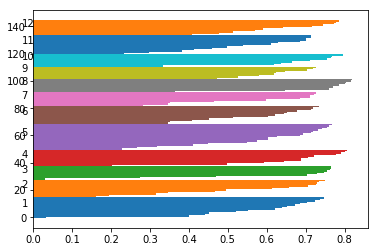

In [269]:
from sklearn.metrics import silhouette_samples, silhouette_score
def draw_barh(k):
    kmeans= KMeans(n_clusters=k)
    labels=kmeans.fit_predict(data_3D_)
    silhouette_vals = silhouette_samples(data_3D_, labels)
    y_ticks = []
    y_lower, y_upper = 0, 0
    fig, ax1 = plt.subplots()
    for i, cluster in enumerate(np.unique(labels)):
            cluster_silhouette_vals = silhouette_vals[labels == cluster]
            cluster_silhouette_vals.sort()
            y_upper += len(cluster_silhouette_vals)
            ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
            ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
            y_lower += len(cluster_silhouette_vals)

<div class="alert alert-block alert-success">
<b>Analyse:</b> 
    après avoir mener une compagne d expériences avec cette méthode
    d évaluation on constate que lorsque k=8 le coéfficient de Silhouette est souvent à son maximum. donc le nombre nombre de cluster qu'on peut avoir depuis cette évalation est 8 groupes avec des préférences différente et on en déduit qu'à partir de k>8 les clusters construits ne rapport pas de nouvelles connaissance pour les préférences des internautes.
</div>


##### On peut continuer ainsi pour plusieurs dimensions et donc traiter tous les genres afin de construire un systeme de recommendation qui prédit à partir des notes qu'un utilisateur a donné pour des films vont nous permettre de l'affecter pour un groupe(cluster) avec des caractéristiques qui répondent à ses préférences de film (genre). (un moyen de visiualisation serait les heamaps).

## Problématique 04: Degré de reussite des films 

##### Dans cette partie on va se servir des fonctions codées précédement pour extraire d'amples informations de nos données. En effet après avoir analysé les plots entre les features de la dataframe movie complémentaire à travers la librairie Seaborn, on constate un rapport de corrélation entre score et budget, donc une problématique plus interessante serait de grouper les films selon leurs degré de reussite en se basant sur ces deux features.

In [451]:
names_to_num={}
i=0
for e in moviesComplementaire['name']:
    names_to_num[i]=e
    i=i+1
#print(list(names_to_num.keys()))
bg_data = pd.DataFrame(list(names_to_num.keys()), columns=['name'])
bg_data['budget']=pd.DataFrame(moviesComplementaire['budget'])
bg_data['score']=pd.DataFrame(moviesComplementaire['score'])
bg_data=bg_data.set_index('name')
bg_data.head()

,budget,score
name,,
0,8000000.0,8.1
1,6000000.0,7.8
2,15000000.0,6.9
3,18500000.0,8.4
4,9000000.0,6.9


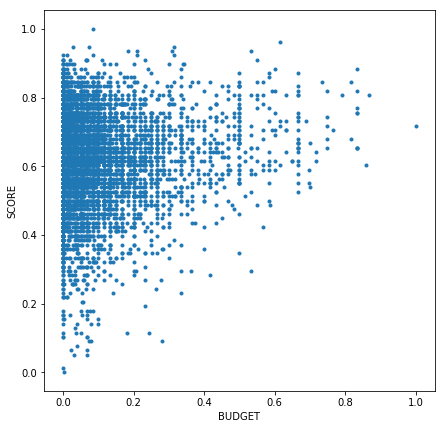

In [452]:
#On normalise les donnée pour avoir des valeurs sur la même échelle
bg_norm2D=km.normalisation(bg_data)
#On appelle à la fonction draw pour visualiser le plot des données
draw(bg_norm2D['budget'], bg_norm2D['score'], 'BUDGET', 'SCORE')

In [456]:
#K=2
centres_2k, l_affectation_2k = km.kmoyennes(1, bg_norm2D, 0.01, 10)

D:\Downloads/Projet3i026\iads\kmoyennes.py:120: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  L=[[] for e in DF_centroid.as_matrix()]
D:\Downloads/Projet3i026\iads\kmoyennes.py:65: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  DF_matrix=DF.as_matrix()
D:\Downloads/Projet3i026\iads\kmoyennes.py:67: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  centroide_matrix=centroide.as_matrix().reshape(2)


iteration 0   Inertie : 146.64088359368702
iteration 1   Inertie : 146.4415367846671
iteration 2   Inertie : 146.32869610709048
iteration 3   Inertie : 146.3075172984009
iteration 4   Inertie : 146.30544200583915


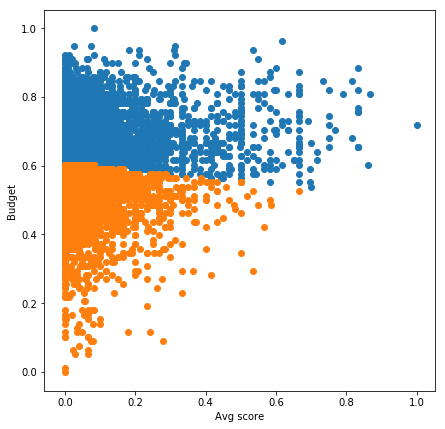

In [457]:
#Plot
km.affiche_resultat(bg_norm2D, centres_2k, l_affectation_2k,'Avg score', 'Budget')

#### Ici on peut remarquer un premier clustering basé sur le budget des films, un premier groupe(orange) avec un budget inférieur à 15e8 dollars et un groupe bleu avec un budget supérieur à 15e8 dollars.

In [459]:
#K=3
centres_2k, l_affectation_2k = km.kmoyennes(2, bg_norm2D, 0.01, 15)

iteration 0   Inertie : 106.51863287748074
iteration 1   Inertie : 91.80885899783638
iteration 2   Inertie : 86.4693532305032
iteration 3   Inertie : 84.22954221850932
iteration 4   Inertie : 83.40661951895767
iteration 5   Inertie : 83.11073304094036
iteration 6   Inertie : 83.01971795976067
iteration 7   Inertie : 82.9633174348206
iteration 8   Inertie : 82.93621788119765
iteration 9   Inertie : 82.92915984587714


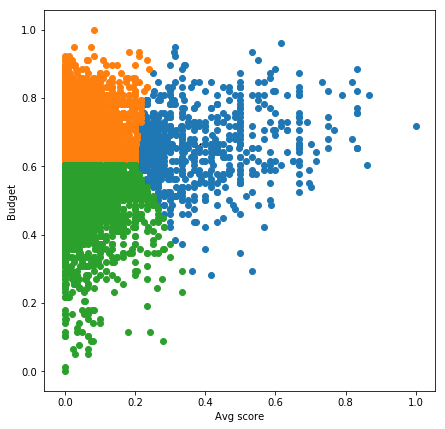

In [460]:
#Plot
km.affiche_resultat(bg_norm2D, centres_2k, l_affectation_2k,'Avg score', 'Budget')

In [461]:
#K=4
centres_2k, l_affectation_2k = km.kmoyennes(3, bg_norm2D, 0.01, 15)

iteration 0   Inertie : 132.2654011685452
iteration 1   Inertie : 105.29029395369795
iteration 2   Inertie : 76.74810018062871
iteration 3   Inertie : 68.49588574173384
iteration 4   Inertie : 66.38135158095946
iteration 5   Inertie : 65.36861727437716
iteration 6   Inertie : 64.87307908807276
iteration 7   Inertie : 64.52539821014486
iteration 8   Inertie : 64.30496324883516
iteration 9   Inertie : 64.20573652644438
iteration 10   Inertie : 64.19083439931315
iteration 11   Inertie : 64.18833891446656


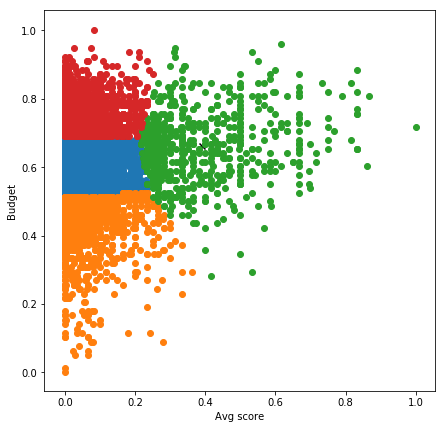

In [462]:
#Plot
km.affiche_resultat(bg_norm2D, centres_2k, l_affectation_2k,'Avg score', 'Budget')

In [465]:
#K=5
centres_2k, l_affectation_2k = km.kmoyennes(4, bg_norm2D, 0.01, 20)

iteration 0   Inertie : 61.0189316630957
iteration 1   Inertie : 57.45271362165208
iteration 2   Inertie : 56.3337236161607
iteration 3   Inertie : 55.01037442819877
iteration 4   Inertie : 53.41656400283283
iteration 5   Inertie : 52.14545152784281
iteration 6   Inertie : 51.19285012816628
iteration 7   Inertie : 50.55903078729044
iteration 8   Inertie : 50.141012870158335
iteration 9   Inertie : 49.957350819854454
iteration 10   Inertie : 49.86972629827713
iteration 11   Inertie : 49.76638885144112
iteration 12   Inertie : 49.70131417853632
iteration 13   Inertie : 49.64973930617772
iteration 14   Inertie : 49.56824549101389
iteration 15   Inertie : 49.55261921400012
iteration 16   Inertie : 49.53623442757341
iteration 17   Inertie : 49.517343949958985
iteration 18   Inertie : 49.50174973389768
iteration 19   Inertie : 49.49708210618953


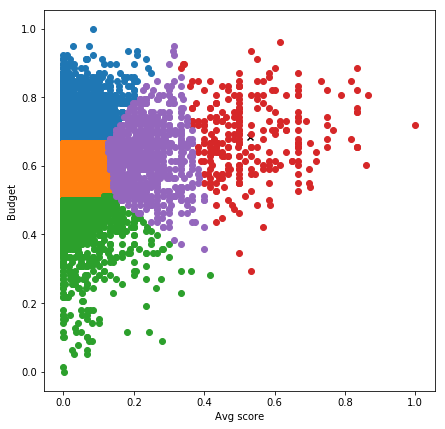

In [466]:
#Plot
km.affiche_resultat(bg_norm2D, centres_2k, l_affectation_2k,'Avg score', 'Budget')

depuis le plot ci-dessus on peut distinguer facilement 5 cluster tel que:
1. groupe vert: des films avec un faible score et un faible budget donc on ne peut pas forcément les classer dans la catégorie des film échoué.
1. groupe orange: un score faible avec un budget un peu plus supérieur à la moyenne, ce groupe des films a fait une dépsense importante mais un echec total au niveau du review (score)
1. groupe bleu : un score faible et un budget très élevé on peut classer ces films dans la catégorie des films échoués. 
1. groupe violet: un score qui se rapproche de la moyenne avec un budget moyen, des film moins reussi
1. groupe rouge: un score fort avec budget moyen, on peut classer ce groupe des films dans la catégorie des films reussi!